# Derek Jeter: Overrated?

## Derek Sanderson Jeter is an American former professional baseball shortstop, businessman, and baseball executive. As a player, Jeter spent his entire 20-year MLB career with the New York Yankees. Nicknamed "The Captain", Derek Jeter is soon to be inducted into the MLB Hall of Fame. There's no denying he was an amazing player, arguably the best player to ever play the shortstop position. But in baseball, there's two sides to the game. We will analyze Derek Jeter's batting performance over his career to see if he can really be the jack of all trades.

# Research Questions

How valuable was Derek Jeter to the NY Yankees when up to bat?

How much did Derek Jeter contribute to the wins based on the batting variables we chose to include?

Looking at other players, was Derek Jeter significantly better at getting a win? Did he contribute more?

Did Derek Jeter improve his batting performance throughout his seasons on the Yankees? Did he peak? Which season was his best? What are his most important contributing factors?

# Data Description


Year - the season the data is from.

RSLT - Result: Win or Loss, tracks whether the baseball game played was a win or a loss for the team

H - hits, tracks how many hits Derek Jeter had in a given game. A hit, also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice

HR - home runs, tracks how many home runs Derek Jeter had in a given game. A home run is scored when the ball is hit in such a way that the batter is able to circle the bases and reach home safely in one play without any errors being committed by the defensive team in the process

SB - stolen base, tracks how many bases Derek Jeter had in a given game. A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

BB - base on balls (walk) tracks how many walks Derek Jeter had in a given game. A base on balls, also known as a walk, occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out

WPA - win probability added, tracks Derek Jeter’s win probability added in a given game. Win probability added is a sport statistic which attempts to measure a player's contribution to a win by figuring the factor by which each specific play made by that player has altered the outcome of a game.

What are the observations (rows) and the attributes (columns)?

-- Each row represents a single game for the 20 seasons he played baseball. The columns each represent a different record of data, or a calculated statistic as explained above.

Why was this dataset created?

-- This data set was created for the purpose of tracking New York Yankees player, Derek Jeter. He was an outstanding player and these statistics were compiled together after each game, each season to allow MLB fans to look back on the result and statistics of the game, and to look at the individual players success.

What processes might have influenced what data was observed and recorded and what was not?

-- Any data that is considered a significant play is recorded. Whenever a player gets a hit, a homerun, times up to bat, etc. The dataset that we are utilizing is a batting log, so only plays that happen while up to bat or on base are recorded.

What preprocessing was done, and how did the data come to be in the form that you are using?

-- The only preprocessed variable in our usage of the dataset is the WPA, win probability added. This is calculated using the data collected throughout the game. We included this in our dataset to compare how much the variables we choose contributed to the actual win probability added.

If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

-- Yes, collecting sports statistics happens at every major league sporting event and even lower levels. The statistics and data are used for many different purposes. The data that is collected and analyzed is used to help increase fan experience and attendance from year to year. Sports analytics are crucial to many teams by helping them become their best through interpretation and analysis of statistics gained in games.


# Data Collection and Cleaning

To collect our data, we scraped online databases of baseball statistics in order to pull all of Derek Jeter’s in game statistics on a game by game basis for every game of his career ranging from 1995 to 2014. This data contained all of his batting statistics including variables such as OPS, BA, CS, GDP, SH, SF, HBP, SO, IBB, RE24, cWPA, and other such acronyms relating to baseball measurements. However, not all of these variables are applicable or comparable in regards to the type of inferences we are trying to make. Thus, in our data cleaning process, we first evaluated which of the variables would be appropriate and comparable for our studies. We came up with a final list of variables including year, home runs, hits, game result, stolen bases, base on balls, and win probability added. These variables are unique in that they are recorded on a game by game basis and do not accumulate, unlike some of the other variables that were included in the stat sheet. Then, with these specific statistics chosen, we cleaned the data by simply excluding the statistics that we did not want, and then combining the statistics that we did want into a single dataframe which is easily processable and neat. Through this process, we cut our dataset from 38 columns over 19 dataframes to a more readable six columns all in one dataframe. 


# Data Limitations

Baseball statistics are inherently limited in the scope of what they measure. Thus, our dataset can only provide limited conclusions as well. This dataset could include many other statistics if it were to be complete and provide the best, most accurate conclusions, but due to the difficulty of processing so many variables and the time constraints of this project, we chose only the most important ones. There is the possibility that there is human error in recording the information, and it is possible that the older statistics from 1995 are not as precise as the ones gathered more recently, given new technology in sports statistic reporting and recording. 


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [43]:
jeter = pd.read_csv("JeterStats.csv")
jeter['win'] = jeter.Rslt.apply(lambda x: 1 if 'W' in x else 0)
jeter_win_subset = jeter[jeter['win']==1]
jeter_loss_subset = jeter[jeter['win']==0]
jeter.head()

,Year,Rslt,H,HR,SB,BB,WPA,win
0,2014,"L,2-6",1,0,0,0,0.026,0
1,2014,"L,1-3",0,0,0,1,-0.051,0
2,2014,"W,4-2",1,0,0,1,0.089,1
3,2014,"L,0-4",0,0,0,2,0.180,0
4,2014,"W,6-4",2,0,0,0,0.007,1


The above code adds a 'win' column to the Jeter dataframe, with the value 1 representing a win, and a 0 representing a loss based on the Rslt column in the jeter dataframe.

In [44]:
contribute = jeter.WPA.mean()
print('Mean WPA: {:.6f}'.format(contribute))

Mean WPA: 0.011262


First and foremost we know Jeter made a contribution to the wins over the 20 seasons he played. Looking at the mean WPA of 0.011262, the positive value shows that on average he contributed to a win. This number has some limitations as a win or loss is not soley based on Jeter's performance. But as we continue to analyze his statistics we can further prove he made a positive contribution to the New York Yankees over his 20 seasons.

In [45]:
walks = np.array(jeter.loc[:,"BB"])
wins = np.array(jeter.loc[:,"win"])
correlation_bb_wins = np.corrcoef(walks,wins)
print("Correlation between walks and wins: ", round(correlation_bb_wins[0][1],4))

Correlation between walks and wins:  0.0581


There is a slight positive correlation between the number of walks Derek Jeter had and the number of wins the Yankees had. This makes sense, as getting to first base is a first step towards scoring, and ultimately towards winning a game.

In [46]:
sb = np.array(jeter.loc[:,"SB"])
wins = np.array(jeter.loc[:,"win"])
correlation_sb_wins = np.corrcoef(sb,wins)
print('Correlation between stolen bases and wins: ', round(correlation_sb_wins[0][1],4))

Correlation between stolen bases and wins:  0.0628


Again there is a slight positive correlation between the number of stolen bases Derek Jeter had and the number of wins he had. Meaning if he stole a base, there is a slight positive probability that the Yankees won that game.

In [47]:
real_slope = 0.1658
real_x = np.array(jeter.loc[:,'SB'])
noise = np.random.normal(0,0.5, size=len(jeter.loc[:,"SB"]))
real_y = real_x * real_slope  +  noise
df = pd.DataFrame({"SB": real_x, "win": real_y})
model = LinearRegression().fit(df[["SB"]], df["win"])
print("Estimated Slope: ", model.coef_[0])

Estimated Slope:  0.19785326487533006


The observed slope is slightly greater than the real slope because of the added noise and unpredictability of said noise.

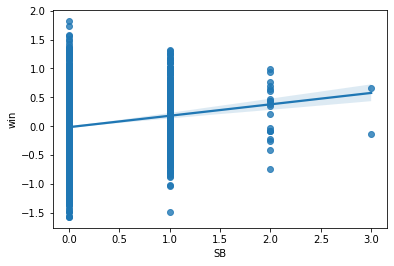

In [48]:
sns.regplot(x='SB', y='win', data=df);

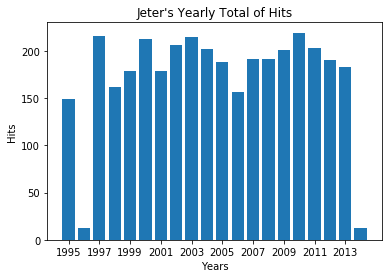

In [49]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['H'])
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title("Jeter's Yearly Total of Hits")
plt.xticks(np.arange(min(years_played), max(years_played)+1, 2.0))
plt.show()

The above graph shows that Derek Jeter recorded the most hits in the seasons of 1997, 2000, 2003, and 2010.

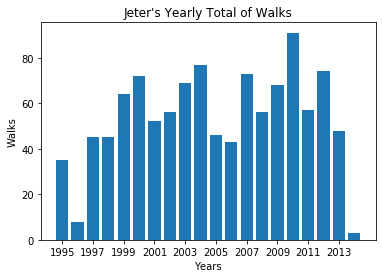

In [50]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['BB'])
plt.xlabel('Years')
plt.ylabel('Walks')
plt.title("Jeter's Yearly Total of Walks")
plt.xticks(np.arange(min(years_played), max(years_played)+1, 2.0))
plt.show()

The above graph shows that Derek Jeter recorded his most walks in the season of 2010.

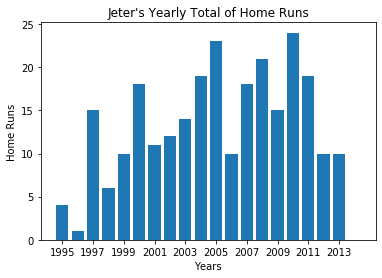

In [51]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['HR'])
plt.xlabel('Years')
plt.ylabel('Home Runs')
plt.title("Jeter's Yearly Total of Home Runs")
plt.xticks(np.arange(min(years_played), max(years_played)+1, 2.0))
plt.show()

The above graph shows that Derek Jeter recorded his most Home Runs in the seasons of 2004 and 2010.

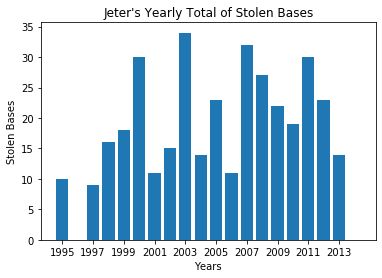

In [52]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['SB'])
plt.xlabel('Years')
plt.ylabel('Stolen Bases')
plt.title("Jeter's Yearly Total of Stolen Bases")
plt.xticks(np.arange(min(years_played), max(years_played)+1, 2.0))
plt.show()

The above graph shows that Derek Jeter recorded the most Stolen Bases in the seasons of 2000, 2003, 2007, and 2011. 

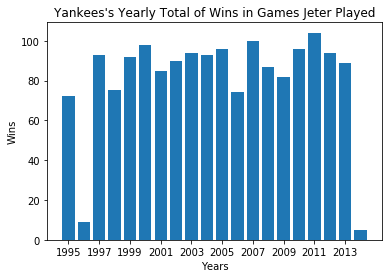

In [53]:
np.arange(jeter["Year"].min(),jeter["Year"].max())
num_hits_year = jeter.groupby('Year').sum()
years_played = jeter["Year"].unique()
plt.bar(x = years_played, height = num_hits_year['win'])
plt.xlabel('Years')
plt.ylabel('Wins')
plt.title("Yankees's Yearly Total of Wins in Games Jeter Played")
plt.xticks(np.arange(min(years_played), max(years_played)+1, 2.0))
plt.show()

The above graph shows that the Yankees won the most games of games that Derek Jeter Played in the seasons of 1997, 2000, 2003, 2005, 2007, 2010, and 2011 

Seasons where Jeter's stats peaked as well as Yankee Wins: 1997, 2000, 2003, 2007, 2010, 2011

From the data analysis from above, Jeter had 6 above average seasons. To further look at Jeter's contributions and importance to the NY Yankees, will will be using his 2010 season to compare to other players in the same season. This will allow us to compare his batting statistics with other players on the Yankees to see if he contributed more to their win.

# Curtis Granderson

Curtis Granderson Jr. is an American former professional baseball outfielder. He played 16 seasons in Major League Baseball for the Detroit Tigers, New York Yankees, New York Mets, Los Angeles Dodgers, Toronto Blue Jays, Milwaukee Brewers, and Miami Marlins.

In [54]:
granderson = pd.read_csv('Granderson.csv')
granderson.head()

,Rk,Gcar,Gtm,Date,Tm,Column1,Opp,Rslt,Inngs,PA,...,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,675,1,Apr 4,NYY,@,BOS,"L,7-9",CG,5,...,0.400,1.000,1.400,7,0.93,0.002,1.00,0.00%,-0.06,CF
1,2,676,2,Apr 6,NYY,@,BOS,"W,6-4",CG,4,...,0.333,0.625,0.958,9,2.41,-0.207,2.47,-0.13%,-1.50,CF
2,3,677,3,Apr 7,NYY,@,BOS,"W,3-1",CG(10),4,...,0.385,0.833,1.218,7,1.55,0.310,1.77,0.21%,0.94,CF
3,4,678,4,Apr 9,NYY,@,TBR,"L,3-9",CG,4,...,0.294,0.625,0.919,9,0.69,-0.071,0.85,-0.05%,-1.20,CF
4,5,679,5,Apr 10,NYY,@,TBR,"W,10-0",CG,5,...,0.409,0.632,1.041,7,0.38,0.040,0.45,0.03%,1.54,CF


# Alex Rodriguez

Alexander Enmanuel Rodriguez, nicknamed "A-Rod," is an American former professional baseball shortstop and third baseman, businessman and philanthropist. Rodriguez played 22 seasons in Major League Baseball for the Seattle Mariners, Texas Rangers, and New York Yankees.

In [55]:
rod = pd.read_csv('Rodriguez.csv')
rod.head()

,Rk,Gcar,Gtm,Date,Tm,Column1,Opp,Rslt,Inngs,PA,...,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,2167,1,Apr 4,NYY,@,BOS,"L,7-9",CG,5,...,0.200,0.400,0.600,4,1.25,0.045,1.35,0.03%,-0.11,3B
1,2,2168,2,Apr 6,NYY,@,BOS,"W,6-4",CG,5,...,0.200,0.400,0.600,4,1.34,0.054,1.37,0.03%,0.31,3B
2,3,2169,3,Apr 7,NYY,@,BOS,"W,3-1",CG(10),5,...,0.133,0.267,0.400,4,1.56,-0.268,1.79,-0.18%,-2.22,3B
3,4,2170,4,Apr 9,NYY,@,TBR,"L,3-9",CG,4,...,0.158,0.368,0.526,4,0.72,0.185,0.89,0.14%,1.08,3B
4,5,2171,5,Apr 10,NYY,@,TBR,"W,10-0",GS-9,5,...,0.250,0.391,0.641,4,0.75,-0.062,0.89,-0.05%,0.01,3B


# Nick Swisher

Nicholas Thompson Swisher is an American former professional baseball outfielder and first baseman in Major League Baseball. He was a switch hitter who threw left-handed, and played for the Oakland Athletics, Chicago White Sox, New York Yankees, Cleveland Indians and Atlanta Braves.

In [56]:
swisher = pd.read_csv('Swisher.csv')
swisher.head()

,Rk,Gcar,Gtm,Date,Tm,Column1,Opp,Rslt,Inngs,PA,...,OBP,SLG,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,Pos
0,1,762,1,Apr 4,NYY,@,BOS,"L,7-9",CG,4,...,0.500,0.333,0.833,8,0.88,-0.051,0.95,-0.03%,-0.92,RF
1,2,763,2,Apr 6,NYY,@,BOS,"W,6-4",GS-9,5,...,0.556,0.714,1.270,7,1.26,0.162,1.29,0.10%,1.69,RF
2,3,764,3,Apr 7,NYY,@,BOS,"W,3-1",GS-10,4,...,0.462,0.545,1.007,8,1.42,0.082,1.62,0.06%,0.04,RF
3,4,765,4,Apr 9,NYY,@,TBR,"L,3-9",CG,4,...,0.471,0.500,0.971,7,0.59,0.066,0.73,0.05%,-0.28,RF
4,5,766,5,Apr 10,NYY,@,TBR,"W,10-0",GS-8,4,...,0.476,0.471,0.947,6,0.29,0.002,0.35,0.00%,0.53,RF


# Data Cleaning and Description

This data set is from the same source as Jeter, just the stats of Josh Hamilton for the 2010 season. They are collected for the same reasons, for fan use and data analysis of the players.

In [57]:
granderson = granderson[['Rslt', 'H', 'HR', 'SB', 'BB', 'WPA']]
granderson['win'] = granderson.Rslt.apply(lambda x: 1 if 'W' in x else 0)
print('Granderson Table:')
granderson.head()

Granderson Table:


,Rslt,H,HR,SB,BB,WPA,win
0,"L,7-9",1,1,0,1,0.002,0
1,"W,6-4",1,0,0,0,-0.207,1
2,"W,3-1",2,1,1,0,0.310,1
3,"L,3-9",0,0,0,0,-0.071,0
4,"W,10-0",2,0,1,2,0.040,1


In [58]:
rod = rod[['Rslt', 'H', 'HR', 'SB', 'BB', 'WPA']]
rod['win'] = rod.Rslt.apply(lambda x: 1 if 'W' in x else 0)
print('Rodriguez Table:')
rod.head()

Rodriguez Table:


,Rslt,H,HR,SB,BB,WPA,win
0,"L,7-9",1,0,0,0,0.045,0
1,"W,6-4",1,0,0,0,0.054,1
2,"W,3-1",0,0,0,0,-0.268,1
3,"L,3-9",1,0,0,0,0.185,0
4,"W,10-0",2,0,0,1,-0.062,1


In [59]:
swisher = swisher[['Rslt', 'H', 'HR', 'SB', 'BB', 'WPA']]
swisher['win'] = swisher.Rslt.apply(lambda x: 1 if 'W' in x else 0)
print('Swisher Table:')
swisher.head()

Swisher Table:


,Rslt,H,HR,SB,BB,WPA,win
0,"L,7-9",1,0,0,1,-0.051,0
1,"W,6-4",2,0,0,0,0.162,1
2,"W,3-1",1,0,0,0,0.082,1
3,"L,3-9",1,0,0,1,0.066,0
4,"W,10-0",1,0,0,1,0.002,1


Now after selecting the same variables as we used with Jeter, we can use these statistics to compare the contribution that Jeter made to Granderson, Rodriguez and Swisher.

In [60]:
jeter_2010 = jeter.loc[jeter['Year'] == 2010]
jeter_2010.head()

,Year,Rslt,H,HR,SB,BB,WPA,win
451,2010,"L,7-8",0,0,0,1,-0.001,0
452,2010,"L,7-9",2,0,1,0,0.000,0
453,2010,"W,6-4",1,0,0,0,0.007,1
454,2010,"W,3-1",1,0,0,1,0.011,1
455,2010,"L,3-9",2,0,0,0,-0.075,0


Above is a reduced dataframe for Jeter containing only game statistics from his 2010 season allowing us to compare him to the other players.

In [61]:
print('Jeter total wins in 2010: ', jeter_2010.win.sum())
print('Granderson total wins in 2010: ', granderson.win.sum())
print('Rodriguez total wins in 2010: ', rod.win.sum())
print('Swisher total wins in 2010: ', swisher.win.sum())

Jeter total wins in 2010:  92
Granderson total wins in 2010:  82
Rodriguez total wins in 2010:  74
Swisher total wins in 2010:  89


From this initial analysis of total wins for the 2010 season for all of these players, Jeter comes out on top with 92 wins. Since all of the data we are using is from the 2010 season we can assume that the other players didn't play every game of the season that they had a win in.

In [62]:
print('Jeter total hits in 2010: ', jeter_2010.H.sum())
print('Granderson total hits in 2010: ', granderson.H.sum())
print('Rodriguez total hits in 2010: ', rod.H.sum())
print('Swisher total hits in 2010: ', swisher.H.sum())

Jeter total hits in 2010:  179
Granderson total hits in 2010:  115
Rodriguez total hits in 2010:  141
Swisher total hits in 2010:  163


When looking at total hits, Jeter had the most hits in the 2010 season but also played in more games than the rest of the players. But a hit does not gain a point in the game of baseball. What does? Homeruns.

In [63]:
print('Jeter total homeruns in 2010: ', jeter_2010.HR.sum())
print('Granderson total homeruns in 2010: ', granderson.HR.sum())
print('Rodriguez total homeruns in 2010: ', rod.HR.sum())
print('Swisher total homeruns in 2010: ', swisher.HR.sum())

Jeter total homeruns in 2010:  10
Granderson total homeruns in 2010:  24
Rodriguez total homeruns in 2010:  30
Swisher total homeruns in 2010:  29


Derek Jeter is now close to the bottom. He has less than half of both of all 3. Plus Jeter played in more games than all of these players. 

Jeter homerun to hit ratio in 2010:  0.055865921787709494
Granderson homerun to hit ratio in 2010:  0.20869565217391303
Rodriguez homerun to hit ratio in 2010:  0.2127659574468085
Swisher homerun to hit ratio in 2010:  0.17791411042944785


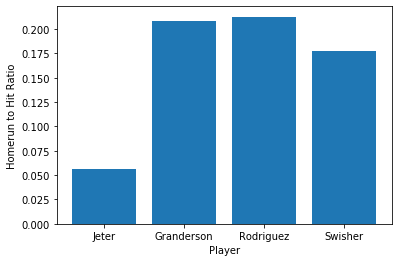

In [64]:
print('Jeter homerun to hit ratio in 2010: ', jeter_2010.HR.sum()/jeter_2010.H.sum())
print('Granderson homerun to hit ratio in 2010: ', granderson.HR.sum()/granderson.H.sum())
print('Rodriguez homerun to hit ratio in 2010: ', rod.HR.sum()/rod.H.sum())
print('Swisher homerun to hit ratio in 2010: ', swisher.HR.sum()/swisher.H.sum())

data = [['Jeter', jeter_2010.HR.sum()/jeter_2010.H.sum()], ['Granderson', granderson.HR.sum()/granderson.H.sum()], ['Rodriguez', rod.HR.sum()/rod.H.sum()], ['Swisher', swisher.HR.sum()/swisher.H.sum()]]
ratios = pd.DataFrame(data, columns = ['Name', 'Ratio'])
plt.bar(x=ratios['Name'], height=ratios['Ratio'])
plt.xlabel('Player')
plt.ylabel('Homerun to Hit Ratio')
plt.show()

Using the total homeruns and hits from each player, I calculated the ratio of homeruns to hits. This number represents the probability that the player will get a homerun on their time on the field and up to bat. I added the bar graph to allow you to visualize the drastic difference of Jeter's ratio. It is less than Swisher, whom has the next lowest.

# Preregistration of analyses

1. We hope to examine which of Derek Jeter's statistics, whether that be walks, stolen bases, hits, home runs, or a combination of stats had the greatest impact on the win rate of the Yankees, how significant of an impact that was, and how our calculations per statistic compare to the overall win probability added (WPA) calculation of Jeter in a given game.



2. We want to determine if Derek Jeter's reputation as a hall of famer is overrated or not. We pulled 3 other fellow Yankees players from the 2010 season, one of Jeters best to see if Jeter is the jack of all trades. We know he is an all star in his short stop position. We wanted to focus on the batting side and see if he contributed more than most on both sides of the game.


# Questions for Reviewers:

- Can we get a bit of feedback on our phase II part, we updated a lot and added more data to further our investigation.

- How can we make our analysis between Jeter and the other players more in depth instead of just comparing the stats directly?